In [1]:
import time
import sys
import os
import numpy as np
import networkx as nx
import random
import time
from matplotlib import pyplot as plt

sys.path.insert(0, os.path.join(os.getcwd(), "..", "cpp_prim", "x64", "Release"))
sys.path.insert(0, os.path.join(os.getcwd(), "..", "py_prim"))
import py_prim
import cpp_prim

In [104]:
def generate_complete_graph(nodes, weight_range=1000):
    graph = nx.complete_graph(nodes)
    for (start, end) in graph.edges:
        graph.edges[start, end]['weight'] = random.randrange(1, weight_range)
    return graph

def generate_random_tree(nodes, weight_range=1000):
    graph = nx.generators.trees.random_tree(nodes)
    for (start, end) in graph.edges:
        graph.edges[start, end]['weight'] = random.randrange(1, weight_rangeweight_range)
    return graph

def generate_random_connected_graph(nodes, probability, weight_range=1000):
    if (probability < 1/nodes):
        raise Exception(f"Please provide probability higher than {1/nodes}")
    graph = nx.generators.fast_gnp_random_graph(nodes, 0)
    scale = 2
    count = 0
    while not nx.is_connected(graph):
        count += 1
#         print(f"Generating random connected graph. Attempts: {count}", end='\r')
        graph = nx.generators.fast_gnp_random_graph(nodes, scale * probability)
    for (start, end) in graph.edges:
        graph.edges[start, end]['weight'] = random.randrange(1, weight_range)
    return graph

def extract_adjacency_matrix(nx_graph):
    adjacency_matrix = nx.to_numpy_array(nx_graph, dtype='int32').tolist()
    return adjacency_matrix

In [ ]:
nx.draw(generate_complete_graph(10))
nx.draw(generate_random_connected_graph(10))
nx.draw(generate_random_tree(10))

In [144]:
def test_on_complete_graph(prim_impl, nodes_range = 300, step = 10):
    elapsed_time = [0]
    nodes_num = [0]
    for nodes in list(range(step, nodes_range, step)):
        print(f"Test on complete graph with {nodes} nodes.", end="\r")
        nodes_num.append(nodes)
        graph = generate_complete_graph(nodes)
        adjacency_matrix = extract_adjacency_matrix(graph)
        start_time = time.time()
        prim_impl.run_algorithm(adjacency_matrix)
        elapsed_time.append(time.time() - start_time)
    return elapsed_time, nodes_num

def test_on_tree(prim_impl, nodes_range = 300, step = 10):
    elapsed_time = [0]
    nodes_num = [0]
    for nodes in list(range(step, nodes_range, step)):
        print(f"Test on random tree with {nodes} nodes.", end="\r")
        nodes_num.append(nodes)
        graph = generate_random_tree(nodes)
        adjacency_matrix = extract_adjacency_matrix(graph)
        start_time = time.time()
        prim_impl.run_algorithm(adjacency_matrix)
        elapsed_time.append(time.time() - start_time)
    return elapsed_time, nodes_num

def test_on_random_connected_graph(prim_impl, nodes_range = 300, step = 10, probability = 0.5):
    elapsed_time = [0]
    nodes_num = [0]
    print(f"Edge probability: {probability}")
    for nodes in list(range(step, nodes_range, step)):
        print(f"Test on random connected graph with {nodes} nodes.", end="\r")
        nodes_num.append(nodes)
        graph = generate_random_connected_graph(nodes, probability)
        adjacency_matrix = extract_adjacency_matrix(graph)
        start_time = time.time()
        prim_impl.run_algorithm(adjacency_matrix)
        elapsed_time.append(time.time() - start_time)
    return elapsed_time, nodes_num

In [90]:
def plot_timing(ax, time_lists=[], node_lists=[], label_lists=[], title=""):
    for time, nodes, label in list(zip(time_lists, node_lists, label_lists)):
        ax.plot(nodes, time, label=label)
    ax.set_xlabel('Number of nodes')
    ax.set_ylabel('Time')
    ax.set_title(title)
    ax.legend()

## Complete graph

In [96]:
cpp_complete_time, cpp_complete_nodes = test_on_complete_graph(cpp_prim, nodes_range=300, step=10)

In [98]:
py_complete_time, py_complete_nodes = test_on_complete_graph(py_prim, nodes_range=1800, step=120)

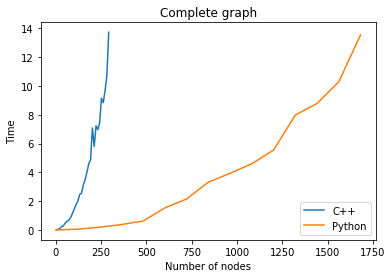

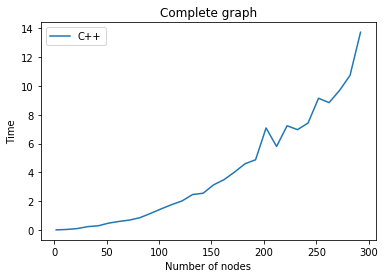

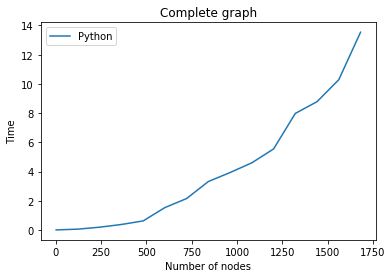

In [99]:
fig, ax = plt.subplots(1, 1)
cpp_fig, cpp_ax = plt.subplots(1, 1)
py_fig, py_ax = plt.subplots(1, 1)
plot_timing(ax, 
            [cpp_complete_time, py_complete_time], 
            [cpp_complete_nodes, py_complete_nodes], 
            ["C++", "Python"],
            title="Complete graph")
plot_timing(cpp_ax, 
            [cpp_complete_time], 
            [cpp_complete_nodes],
            ["C++"],
            title="Complete graph")
plot_timing(py_ax, 
            [py_complete_time], 
            [py_complete_nodes],
            ["Python"],
            title="Complete graph")

## Random tree

In [101]:
cpp_tree_time, cpp_tree_nodes = test_on_tree(cpp_prim, nodes_range=300, step=10)

In [102]:
py_tree_time, py_tree_nodes = test_on_tree(py_prim, nodes_range=10000, step=500)

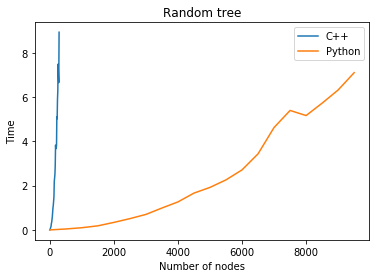

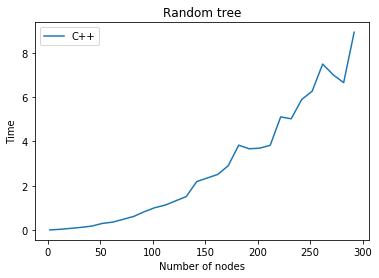

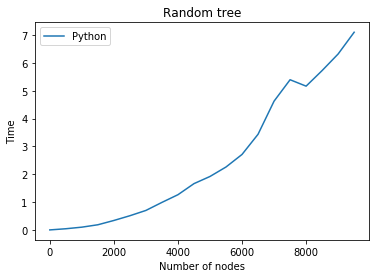

In [103]:
fig, ax = plt.subplots(1, 1)
cpp_fig, cpp_ax = plt.subplots(1, 1)
py_fig, py_ax = plt.subplots(1, 1)
plot_timing(ax, 
            [cpp_tree_time, py_tree_time], 
            [cpp_tree_nodes, py_tree_nodes], 
            ["C++", "Python"],
            title="Random tree")
plot_timing(cpp_ax, 
            [cpp_tree_time], 
            [cpp_tree_nodes],
            ["C++"],
            title="Random tree")
plot_timing(py_ax, 
            [py_tree_time], 
            [py_tree_nodes],
            ["Python"],
            title="Random tree")

## Random Connected Graph

In [105]:
cpp_random_time, cpp_random_nodes = test_on_random_connected_graph(cpp_prim, 
                                                                   nodes_range=300,
                                                                   step=10,
                                                                   probability=0.5)

In [106]:
py_random_time, py_random_nodes = test_on_random_connected_graph(py_prim, nodes_range=2000, step=200)

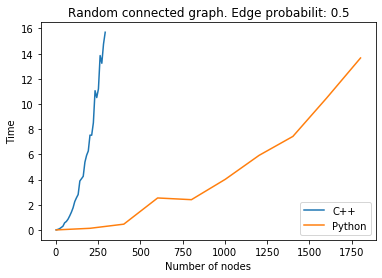

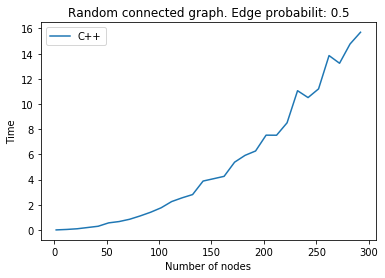

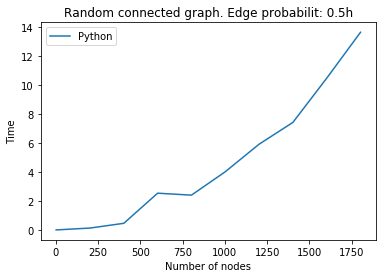

In [107]:
fig, ax = plt.subplots(1, 1)
cpp_fig, cpp_ax = plt.subplots(1, 1)
py_fig, py_ax = plt.subplots(1, 1)
plot_timing(ax, 
            [cpp_random_time, py_random_time], 
            [cpp_random_nodes, py_random_nodes], 
            ["C++", "Python"],
            title=f"Random connected graph. Edge probabilit: {0.5}")
plot_timing(cpp_ax, 
            [cpp_random_time], 
            [cpp_random_nodes],
            ["C++"],
            title=f"Random connected graph. Edge probabilit: {0.5}")
plot_timing(py_ax, 
            [py_random_time], 
            [py_random_nodes],
            ["Python"],
            title=f"Random connected graph. Edge probabilit: {0.5}h")

## Random tree vs Random connected graph vs Complete graph

### C++

Expanding number of nodes in graph fed to C++ implementation, so that there will be a clearer difference between different graph types

In [120]:
cpp_complete_time_expanded, cpp_complete_nodes_expanded = test_on_complete_graph(cpp_prim, nodes_range=1000, step=200)

In [123]:
cpp_random_time_expanded, cpp_random_nodes_expanded = test_on_random_connected_graph(cpp_prim, nodes_range=1000, step=200, probability=0.1)

In [124]:
cpp_tree_time_expanded, cpp_tree_nodes_expanded = test_on_tree(cpp_prim, nodes_range=1000, step=200)

### Python

In [145]:
py_complete_time_expanded, py_complete_nodes_expanded = test_on_complete_graph(py_prim, nodes_range=1000, step=50)

In [147]:
py_random_time_expanded, py_random_nodes_expanded = test_on_random_connected_graph(py_prim, nodes_range=1000, step=10, probability=0.2)

Edge probability: 0.2


In [148]:
py_tree_time_expanded, py_tree_nodes_expanded = test_on_tree(py_prim, nodes_range=1000, step=10)

### Evaluation time plot

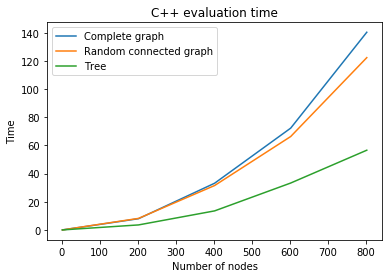

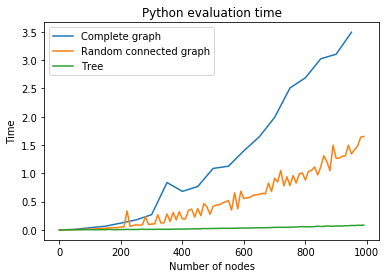

In [149]:
cpp_fig, cpp_ax = plt.subplots(1,1)
py_fig, py_ax = plt.subplots(1,1)
# py_fig_2, py_ax_2 = plt.subplots(1,1)
plot_timing(cpp_ax, 
            [cpp_complete_time_expanded, cpp_random_time_expanded, cpp_tree_time_expanded],
            [cpp_complete_nodes_expanded, cpp_random_nodes_expanded, cpp_tree_nodes_expanded],
            ["Complete graph", "Random connected graph", "Tree"],
            title="C++ evaluation time")
# plot_timing(py_ax, 
#             [py_complete_time,  py_random_time],
#             [py_complete_nodes, py_random_nodes],
#             ["Complete graph", "Random connected graph", "Tree"],
#             title="Python evaluation time")
plot_timing(py_ax, 
            [py_complete_time_expanded, py_random_time_expanded, py_tree_time_expanded],
            [py_complete_nodes_expanded, py_random_nodes_expanded, py_tree_nodes_expanded],
            ["Complete graph", "Random connected graph", "Tree"],
            title="Python evaluation time")